In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("finalized_players.csv")
print(df)

            Player Name    Pos          Squad          League   90s  Tkl  \
0            Max Aarons     DF    Bournemouth  Premier League  13.7   29   
1      Yunis Abdelhamid     DF          Reims         Ligue 1  30.9   64   
2     Salis Abdul Samed     MF           Lens         Ligue 1  16.9   21   
3       Laurent Abergel     MF        Lorient         Ligue 1  31.8   85   
4                 Abner     DF          Betis         La Liga  15.6   25   
...                 ...    ...            ...             ...   ...  ...   
3647       Nadir Zortea  DF,MF    Salernitana         Serie A  15.7   21   
3648         Kurt Zouma     DF       West Ham  Premier League  23.1   11   
3649      Igor Zubeldia     DF  Real Sociedad         La Liga  18.3   20   
3650   Martín Zubimendi     MF  Real Sociedad         La Liga  28.8   52   
3651   Szymon Żurkowski     MF         Empoli         Serie A  25.6   58   

      TklW  Def 3rd  Mid 3rd  Att 3rd  ...  Off  Crs  PKcon  OG  Recov  Won  \
0       

In [3]:
df = pd.read_csv("finalized_players.csv")

df = df.drop(columns=['Player Name'])  # 'Player Name' is just an identifier

# Handle categorical variables using one-hot encoding
categorical_cols = ['Pos', 'Squad', 'League', 'Season']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (fill with median values)
df = df.fillna(df.median())

#selected_columns = [
#    'Tkl', 'Tkl%', 'Tkl+Int', 'Int', 'Blocks', 'Clr', 'Def 3rd', 'Mid 3rd',
#    'Won%', 'Lost', 'Err', 'Sh', 'Pass', 'Att', 'Att 3rd', '90s'
#]

# Step 1: Filter the DataFrame to include only the selected columns
#df = df[selected_columns]

# Define features and target
X = df.drop(columns=['Rating', 'Pos', 'Squad', 'League', 'Season'], errors='ignore')
#y = df['Rating']  # Target variable

In [4]:
print(X)

       90s  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  Chl-Tkl  Att  Tkl%  \
0     13.7   29    19       20        7        2       20   34  58.8   
1     30.9   64    35       36       23        5       26   45  57.8   
2     16.9   21    14        8       10        3        8   18  44.4   
3     31.8   85    52       43       34        8       38   96  39.6   
4     15.6   25    19       15        9        1       17   34  50.0   
...    ...  ...   ...      ...      ...      ...      ...  ...   ...   
3647  15.7   21    15        9        7        5       11   19  57.9   
3648  23.1   11     6        8        3        0        4    7  57.1   
3649  18.3   20    10       12        8        0       12   18  66.7   
3650  28.8   52    25       19       30        3       22   44  50.0   
3651  25.6   58    33       24       21       13       29   68  42.6   

      Chl-Lost  ...  Squad_Werder Bremen  Squad_West Ham  Squad_Wolfsburg  \
0           14  ...                False           False  

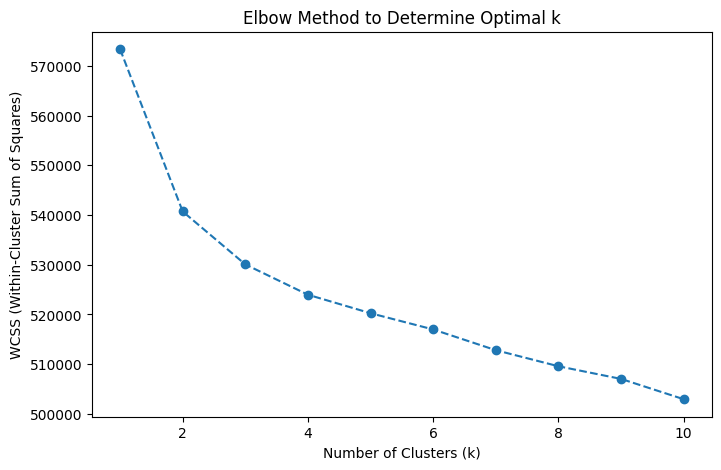

C:\Users\qrJos\AppData\Local\Temp\ipykernel_23508\266209939.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['PCA1'] = X_pca[:, 0]
C:\Users\qrJos\AppData\Local\Temp\ipykernel_23508\266209939.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['PCA2'] = X_pca[:, 1]


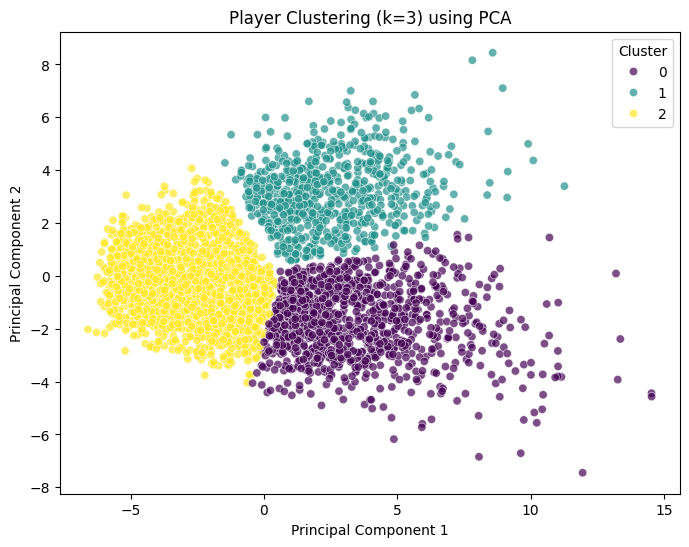

               90s        Tkl       TklW    Def 3rd    Mid 3rd   Att 3rd  \
Cluster                                                                    
0        26.100000  57.999020  34.112745  27.032353  24.075490  6.891176   
1        26.555571  40.931224  24.554333  25.667125  13.254470  2.009629   
2        12.941995  22.306037  13.244619  11.487139   8.513911  2.304987   

           Chl-Tkl        Att       Tkl%   Chl-Lost  ...  Squad_Wolfsburg  \
Cluster                                              ...                    
0        27.809804  57.975490  48.360588  30.165686  ...         0.007843   
1        20.738652  33.894085  61.421320  13.155433  ...         0.009629   
2        10.909186  21.617323  51.831339  10.708136  ...         0.007874   

         Squad_Wolves  League_La Liga  League_Ligue 1  League_Premier League  \
Cluster                                                                        
0            0.012745        0.216667        0.218627               0.220

In [10]:
# Define features (EXCLUDING 'Rating' since we don't have it)
X = df.drop(columns=['Rating', 'Pos', 'Squad', 'League', 'Season'], errors='ignore')  # Drop 'Rating' if it exists

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# Train K-Means with optimal k (e.g., k=3 based on the elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df, alpha=0.7)
plt.title(f'Player Clustering (k={optimal_k}) using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display basic statistics of each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


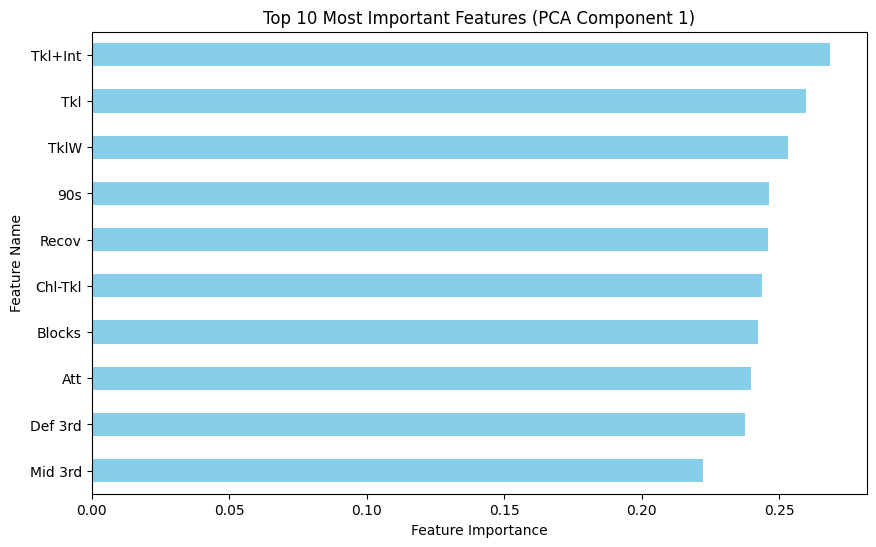

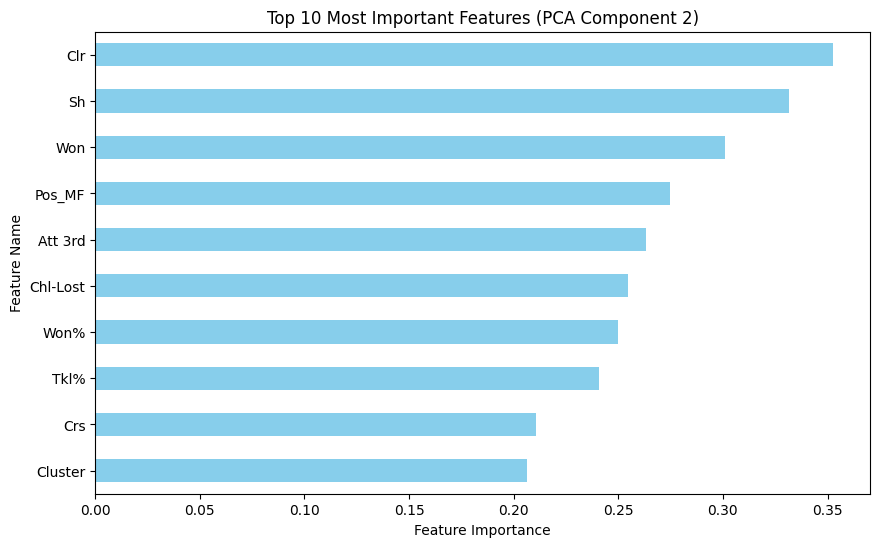

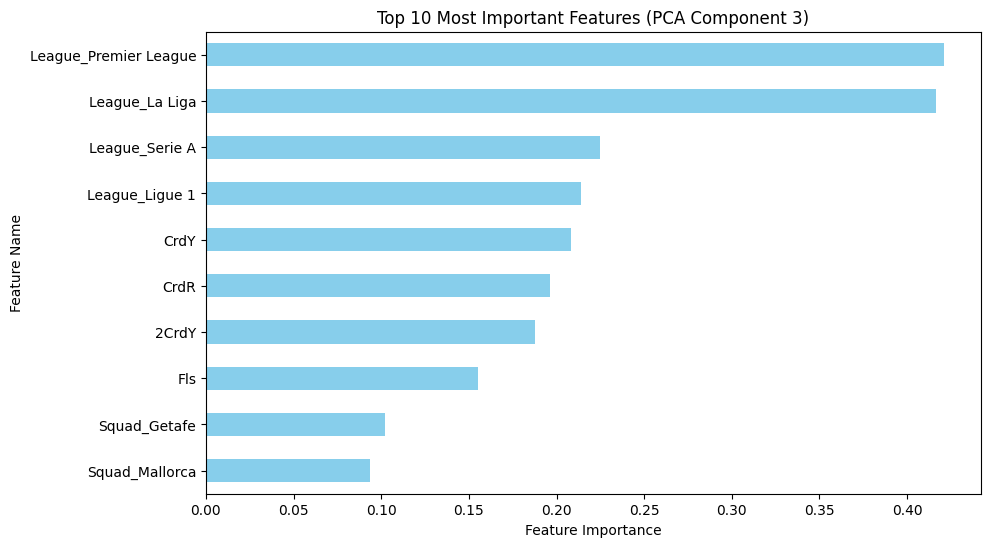

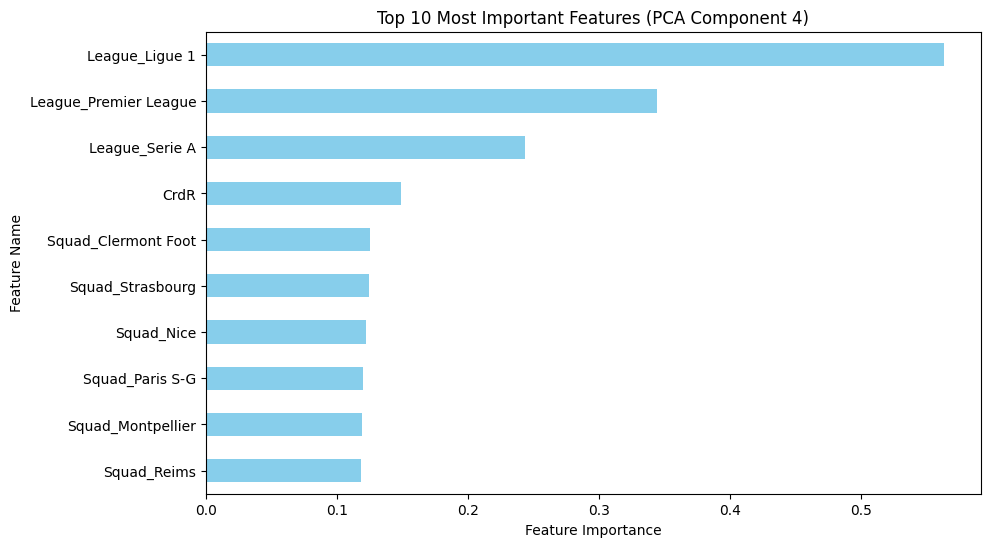

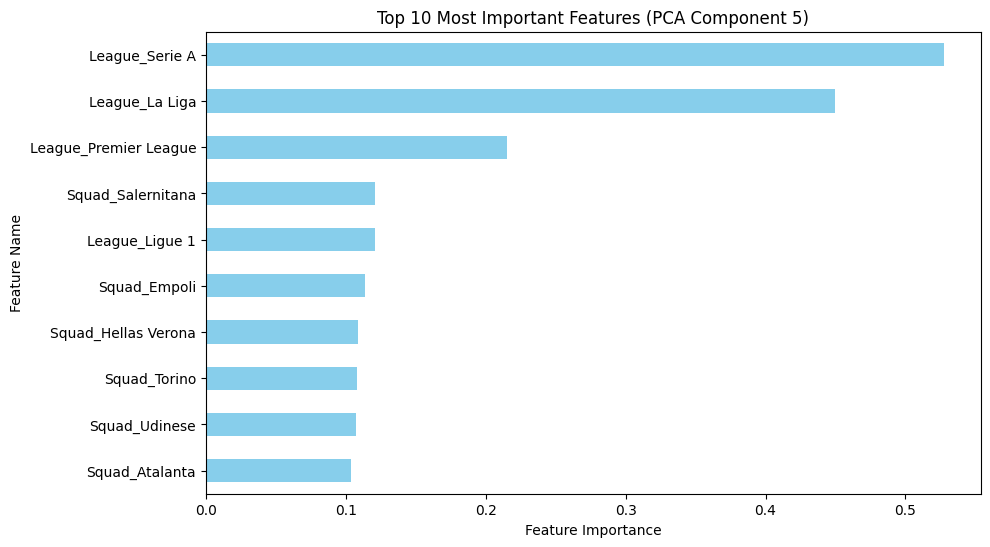

In [18]:
# Standardize features

X = X.drop(columns=['Rating', 'Pos', 'Squad', 'League', 'Season'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=5)  # First 5 components for analysis
X_pca = pca.fit_transform(X_scaled)

# Get PCA loadings (Feature importance)
feature_importance = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(5)])

# Plot Top Features for the First Principal Component
for i in range(1, 6):
    plt.figure(figsize=(10,6))
    feature_importance['PC' + str(i)].abs().sort_values(ascending=False)[:10].plot(kind='barh', color='skyblue')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title("Top 10 Most Important Features (PCA Component " + str(i) + ")")
    plt.gca().invert_yaxis()
    plt.show()

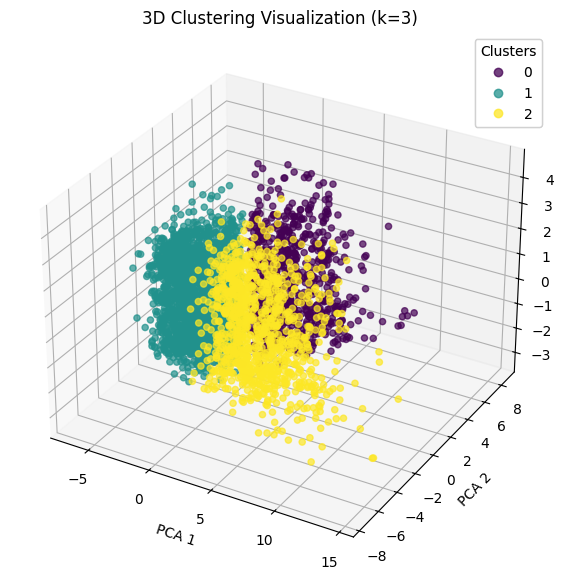

In [15]:
# Perform K-Means clustering
optimal_k = 3  # Adjust based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', alpha=0.7)

# Labels and title
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title(f"3D Clustering Visualization (k={optimal_k})")

# Color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [16]:
# Get mean values of each cluster
cluster_summary = df.groupby('Cluster').mean()

# Sort by key defensive features
defensive_features = [
    # 🔹 Core Defensive Actions
    'Tkl', 'Tkl%', 'Tkl+Int', 'Int', 'Blocks', 'Clr',

    # 🔹 Defensive Zone Actions
    'Def 3rd', 'Mid 3rd',

    # 🔹 Possession & Errors
    'Won%', 'Lost', 'Err',

    # 🔹 Other Contributions
    'Sh', 'Pass', 'Att', 'Att 3rd', '90s'
]
defender_clusters = cluster_summary[defensive_features].sort_values(by='Tkl', ascending=False)

print(defender_clusters)

               Tkl       Tkl%    Tkl+Int        Int     Blocks        Clr  \
Cluster                                                                     
2        58.060964  48.354671  87.568338  29.507375  32.605703  40.794494   
0        40.934066  61.423077  75.423077  34.489011  33.563187  99.964286   
1        22.318301  51.823335  35.598322  13.280021  14.881489  28.367069   

           Def 3rd    Mid 3rd       Won%       Lost       Err         Sh  \
Cluster                                                                    
2        27.066863  24.107178  48.371976  27.231072  0.672566   7.426745   
0        25.671703  13.251374  59.893407  37.443681  1.137363  19.017857   
1        11.484006   8.520189  49.628579  14.762979  0.394337   5.044573   

              Pass        Att   Att 3rd        90s  
Cluster                                             
2        25.178958  58.018682  6.886922  26.110816  
0        14.545330  33.917582  2.010989  26.542308  
1         9.836917  2

In [17]:
import pandas as pd

# Cluster summary data
data = {
    'Cluster': [1, 2, 0],
    'Tkl': [58.33, 40.87, 22.31],
    'Tkl%': [48.32, 61.54, 51.71],
    'Tkl+Int': [88.04, 75.06, 35.56],
    'Int': [29.71, 34.20, 13.25],
    'Blocks': [32.74, 33.35, 14.88],
    'Clr': [41.08, 99.06, 28.19],
    'Def 3rd': [27.20, 25.59, 11.45],
    'Mid 3rd': [24.23, 13.24, 8.53],
    'Won%': [48.36, 59.95, 49.54],
    'Lost': [27.48, 36.98, 14.75],
    'Err': [0.67, 1.13, 0.39],
    'Sh': [7.46, 18.86, 5.01],
    'Pass': [25.28, 14.49, 9.87],
    'Att': [58.31, 33.82, 21.67],
    'Att 3rd': [6.90, 2.03, 2.33],
    '90s': [26.14, 26.42, 12.99]
}

# Create DataFrame
df_clusters = pd.DataFrame(data)

# Set 'Cluster' as the index for easier viewing
df_clusters.set_index('Cluster', inplace=True)

# Display the DataFrame
df_clusters


,Tkl,Tkl%,Tkl+Int,Int,Blocks,Clr,Def 3rd,Mid 3rd,Won%,Lost,Err,Sh,Pass,Att,Att 3rd,90s
Cluster,,,,,,,,,,,,,,,,
1,58.33,48.32,88.04,29.71,32.74,41.08,27.20,24.23,48.36,27.48,0.67,7.46,25.28,58.31,6.90,26.14
2,40.87,61.54,75.06,34.20,33.35,99.06,25.59,13.24,59.95,36.98,1.13,18.86,14.49,33.82,2.03,26.42
0,22.31,51.71,35.56,13.25,14.88,28.19,11.45,8.53,49.54,14.75,0.39,5.01,9.87,21.67,2.33,12.99
